In [2]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil

TRAINING_DIR = "./fire_dataset1/Training"
training_datagen = ImageDataGenerator(rescale = 1./255,
                                        horizontal_flip=True,
                                        rotation_range=30,
                                        height_shift_range=0.2,
                                        fill_mode='nearest')

# Initialize the data generator
VALIDATION_DIR = "./fire_dataset1/Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                        target_size=(224,224),
                                                        class_mode='categorical',
                                                        batch_size = 64)

validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                target_size=(224,224),
                                                                class_mode='categorical',
                                                                batch_size= 16)

Found 980 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


In [4]:
from tensorflow.keras.optimizers import RMSprop,Adam
model = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
          tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2048, activation='relu'),
          tf.keras.layers.Dropout(0.25),
          tf.keras.layers.Dense(1024, activation='relu'),
          tf.keras.layers.Dropout(0.2),
          tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 384)        0

C:\Users\Admin\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [6]:
# If validation accuracy reach more than 98% then stop
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_acc')>=0.98):
      print('\nReached ^98%')
      self.model.stop_training = True
callbacks = myCallback()

history = model.fit(
    train_generator,
    steps_per_epoch = 15,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 15,
    callbacks=[callbacks]
)

Epoch 1/50
15/15 [==============================] - 30s 1s/step - loss: 0.5536 - acc: 0.6976 - val_loss: 0.4088 - val_acc: 0.8410
Epoch 2/50
15/15 [==============================] - 16s 1s/step - loss: 0.3340 - acc: 0.8614 - val_loss: 0.2482 - val_acc: 0.9205
Epoch 3/50
15/15 [==============================] - 16s 1s/step - loss: 0.2815 - acc: 0.8843 - val_loss: 0.2346 - val_acc: 0.9247
Epoch 4/50
15/15 [==============================] - 16s 1s/step - loss: 0.2418 - acc: 0.9083 - val_loss: 0.2274 - val_acc: 0.9331
Epoch 5/50
15/15 [==============================] - 16s 1s/step - loss: 0.2282 - acc: 0.9148 - val_loss: 0.2005 - val_acc: 0.9372
Epoch 6/50
15/15 [==============================] - 16s 1s/step - loss: 0.2006 - acc: 0.9225 - val_loss: 0.1977 - val_acc: 0.9414
Epoch 7/50
15/15 [==============================] - 16s 1s/step - loss: 0.2127 - acc: 0.9170 - val_loss: 0.2077 - val_acc: 0.9414
Epoch 8/50
15/15 [==============================] - 16s 1s/step - loss: 0.2185 - acc: 0.90

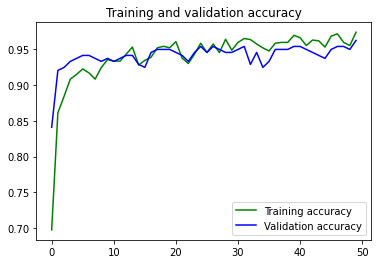

<Figure size 432x288 with 0 Axes>

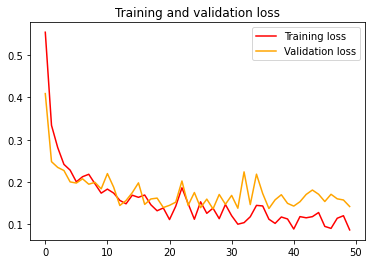

<Figure size 432x288 with 0 Axes>

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [9]:
import os
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)


model.save_weights(checkpoint_path.format(epoch=0))

In [7]:
#predicting any random image
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()
for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0) /255
  classes = model.predict(x)
  print(np.argmax(classes[0])==0, max(classes[0]))

Saving fire.jpg to fire (3).jpg
Saving me.jpg to me (3).jpg
Saving nonfire.jpg to nonfire (3).jpg
True 0.9651741
True 0.5265175
False 0.994662
